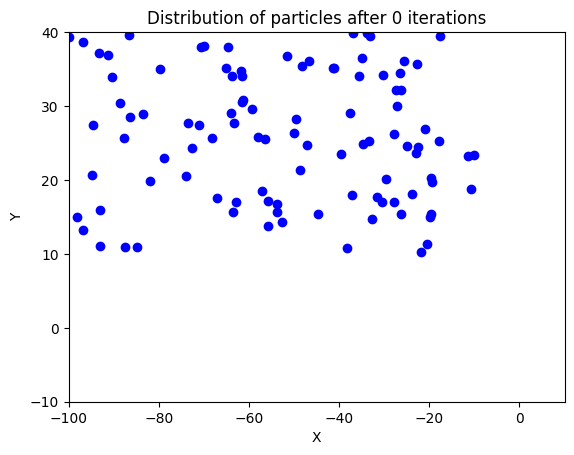

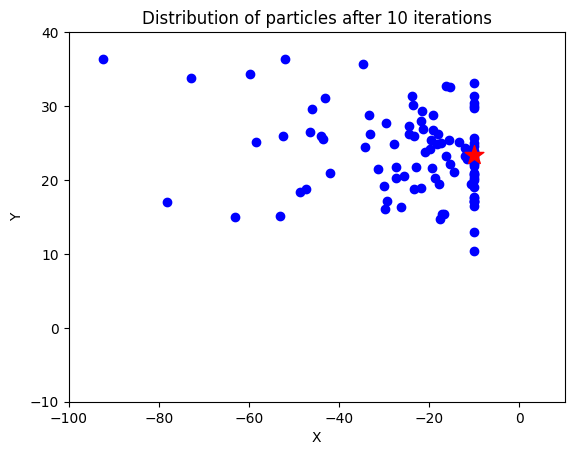

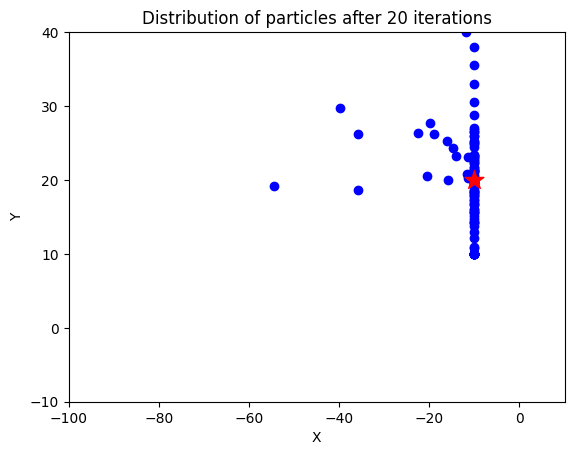

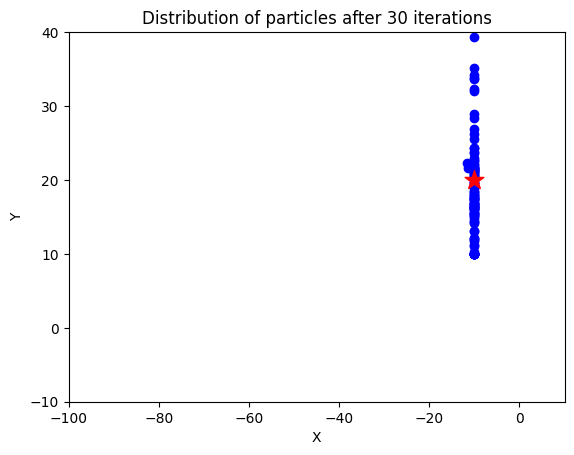

最佳解： [-10.          19.93551864]
最佳適應值： 1225.0041578455573


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定義目標函數（在這裡以最小化為例）
def objective_function(x):
    return (x[0]-25)**2 + (x[1]-20)**2

# 定義粒子類別
class Particle:
    def __init__(self, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1])
        self.velocity = np.random.uniform(-1, 1)
        self.best_position = self.position
        self.best_fitness = float('inf')

    def update_velocity(self, global_best_position, inertia_weight, cognitive_weight, social_weight):
        r1 = np.random.random()
        r2 = np.random.random()

        cognitive_component = cognitive_weight * r1 * (self.best_position - self.position)
        social_component = social_weight * r2 * (global_best_position - self.position)

        self.velocity = inertia_weight * self.velocity + cognitive_component + social_component

    def update_position(self, bounds):
        self.position = self.position + self.velocity

        # 確保粒子位置在範圍內
        self.position = np.clip(self.position, bounds[0], bounds[1])

    def evaluate_fitness(self, objective_function):
        fitness = objective_function(self.position)

        if fitness < self.best_fitness:
            self.best_position = self.position
            self.best_fitness = fitness

# 定義粒子群優化函數
def particle_swarm_optimization(objective_function, bounds, num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight):
    particles = [Particle(bounds) for _ in range(num_particles)]
    global_best_fitness = float('inf')
    global_best_position = None

    # 在粒子群優化函數中，每迭代 10 次就畫一次分布圖,所有粒子畫成藍色點，而全域最佳解的位置則會以紅色星號表示。
    for i in range(0, max_iterations, 10):
        particles_position = np.array([particle.position for particle in particles])
        plt.scatter(particles_position[:, 0], particles_position[:, 1], color='b')
        if global_best_position is not None:
            plt.scatter(global_best_position[0], global_best_position[1], color='r', marker='*', s=200)
        plt.xlim(bounds[0][0], bounds[0][1])
        plt.ylim(bounds[1][0], bounds[1][1])
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(f'Distribution of particles after {i} iterations')
        plt.show()

        for particle in particles:
            particle.evaluate_fitness(objective_function)

            if particle.best_fitness < global_best_fitness:
                global_best_fitness = particle.best_fitness
                global_best_position = particle.best_position

            particle.update_velocity(global_best_position, inertia_weight, cognitive_weight, social_weight)
            particle.update_position(bounds)

    return global_best_position, global_best_fitness

# 執行粒子群優化
bounds = [(-100, 10), (-10, 40)]  # 自變量的範圍
num_particles = 100  # 粒子數量
max_iterations = 40  # 迭代次數
inertia_weight = 0.7  # 慣性權重
cognitive_weight = 2.0  # 認知權重 c1
social_weight = 2.0  # 社會權重 c2

best_position, best_fitness = particle_swarm_optimization(objective_function, bounds, num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight)

print("最佳解：", best_position)
print("最佳適應值：", best_fitness)
